## Import required Libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp

import pickle


%matplotlib inline


## import data

In [2]:
col_list1 = ['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'CO2 EMISSIONS ']

col_list2 = ['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'CO2 EMISSIONS ', 'CO2']

col_list3 = ['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'CO2 EMISSIONS ','CO2', 'SMOG']

col_list4 = ['Model', 'Make', 'Model.1', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel Consumption', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'CO2 Emissions', 'CO2', 'Smog']

col_list_2015 = ['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION*', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'CO2 EMISSIONS ']


In [3]:
d = {}

d['MODEL']            = 'year'
d['MAKE']             = 'company'
d['MODEL.1']          = 'model_name'
d['VEHICLE CLASS']    = 'vehicle_class'
d['ENGINE SIZE']      = 'engine_size'
d['CYLINDERS']        = 'cylinders'
d['TRANSMISSION']     = 'transmission'
d['FUEL']             = 'fuel_type'
d['FUEL CONSUMPTION'] = 'fuel_consumption_city'
d['Unnamed: 9']       = 'fuel_consumption_highway'
d['Unnamed: 10']      = 'fuel_consumption_comb1'
d['Unnamed: 11']      = 'fuel_consumption_comb2'
d['CO2 EMISSIONS ']   = 'co2_emissions'
d['FUEL CONSUMPTION*']= 'fuel_consumption_city'
d['CO2']              = 'co2_rating'
d['SMOG']             = 'smog_rating'
d['Smog']             = 'smog_rating'
d['Model']            = 'year'
d['Make']             = 'company'
d['Model.1']          = 'model_name'
d['Vehicle Class']    = 'vehicle_class'
d['Engine Size']      = 'engine_size'
d['Cylinders']        = 'cylinders'
d['Transmission']     = 'transmission'
d['Fuel']             = 'fuel_type'
d['Fuel Consumption'] = 'fuel_consumption_city'
d['CO2 Emissions']    = 'co2_emissions'

## Dataset for 1995-1999

In [4]:
d1 = pd.read_csv('1995_to_99.csv', usecols = col_list1)
col1 = d1.columns
col1

Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'CO2 EMISSIONS '],
      dtype='object')

In [5]:
#d1: Renaming columns

d1.rename(columns=d, inplace = True)


In [6]:
#d1: Dealing with NaN

d1.dropna(inplace=True)

In [7]:
#d1: Converting column dtypes

d1['cylinders']                = d1['cylinders'].astype('float')
d1['engine_size']              = d1['engine_size'].astype('float')
d1['fuel_consumption_city']    = d1['fuel_consumption_city'].astype('float')
d1['fuel_consumption_highway'] = d1['fuel_consumption_highway'].astype('float')
d1['fuel_consumption_comb1']   = d1['fuel_consumption_comb1'].astype('float')
d1['fuel_consumption_comb2']   = d1['fuel_consumption_comb2'].astype('float')
d1['co2_emissions']            = d1['co2_emissions'].astype('int')

## Dataset for 2000-2014

In [8]:
#Import Dataset for CO2 Emission from 2000-2014

d2 = pd.read_csv('2000_to_14.csv', usecols = col_list1)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,4,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
#Rename columns 

d2.rename(columns=d, inplace = True)
col2 = d2.columns
col2

Index(['year', 'company', 'model_name', 'vehicle_class', 'engine_size',
       'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_highway', 'fuel_consumption_comb1',
       'fuel_consumption_comb2', 'co2_emissions'],
      dtype='object')

In [10]:
#Dealing with NaN values

d2.dropna(inplace=True)

In [11]:
#Converting dtypes of columns

d2['cylinders']                = d2['cylinders'].astype('float')
d2['engine_size']              = d2['engine_size'].astype('float')
d2['fuel_consumption_city']    = d2['fuel_consumption_city'].astype('float')
d2['fuel_consumption_highway'] = d2['fuel_consumption_highway'].astype('float')
d2['fuel_consumption_comb1']   = d2['fuel_consumption_comb1'].astype('float')
d2['fuel_consumption_comb2']   = d2['fuel_consumption_comb2'].astype('float')
d2['co2_emissions']            = d2['co2_emissions'].astype('int')

## Dataset for year 2015

In [12]:
#Import dataset

d3 = pd.read_csv('2015.csv', usecols = col_list_2015)
col3 = d3.columns
col3

Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION*', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'CO2 EMISSIONS '],
      dtype='object')

In [13]:
#Dealing with NaN values

d3.dropna(inplace=True)

In [14]:
#Renaking Columns of Dataset

d3.rename(columns=d, inplace = True)

In [15]:
#Converting dtypes of columns

d3['cylinders']                = d3['cylinders'].astype('float')
d3['engine_size']              = d3['engine_size'].astype('float')
d3['fuel_consumption_city']    = d3['fuel_consumption_city'].astype('float')
d3['fuel_consumption_highway'] = d3['fuel_consumption_highway'].astype('float')
d3['fuel_consumption_comb1']   = d3['fuel_consumption_comb1'].astype('float')
d3['fuel_consumption_comb2']   = d3['fuel_consumption_comb2'].astype('float')
d3['co2_emissions']            = d3['co2_emissions'].astype('int')

## Dataset for year 2016

In [16]:
#Import Dataset

d4 = pd.read_csv('2016.csv', usecols = col_list2)

In [17]:
#Dealing with NaN values

d4.dropna(inplace=True)

In [18]:
#Renaming Columns of Dataset

d4.rename(columns=d, inplace = True)

In [19]:
#Converting dtypes of columns

d4['cylinders']                = d4['cylinders'].astype('float')
d4['engine_size']              = d4['engine_size'].astype('float')
d4['fuel_consumption_city']    = d4['fuel_consumption_city'].astype('float')
d4['fuel_consumption_highway'] = d4['fuel_consumption_highway'].astype('float')
d4['fuel_consumption_comb1']   = d4['fuel_consumption_comb1'].astype('float')
d4['fuel_consumption_comb2']   = d4['fuel_consumption_comb2'].astype('float')
d4['co2_emissions']            = d4['co2_emissions'].astype('int')
d4['co2_rating']               = d4['co2_rating'].astype('float')

## Dataset for year 2017

In [20]:
#Import Dataset

d5 = pd.read_csv('2017.csv', usecols = col_list3)

In [21]:
#Dealing with NaN values

d5.dropna(inplace=True)

In [22]:
#Renaming Columns of Dataset

d5.rename(columns=d, inplace = True)

In [23]:
#Converting dtypes of columns

d5['cylinders']                = d5['cylinders'].astype('float')
d5['engine_size']              = d5['engine_size'].astype('float')
d5['fuel_consumption_city']    = d5['fuel_consumption_city'].astype('float')
d5['fuel_consumption_highway'] = d5['fuel_consumption_highway'].astype('float')
d5['fuel_consumption_comb1']   = d5['fuel_consumption_comb1'].astype('float')
d5['fuel_consumption_comb2']   = d5['fuel_consumption_comb2'].astype('float')
d5['co2_emissions']            = d5['co2_emissions'].astype('int')
d5['co2_rating']               = d5['co2_rating'].astype('float')
d5['smog_rating']              = d5['smog_rating'].astype('float')

## Dataset for year 2018

In [24]:
#Import Dataset

d6 = pd.read_csv('2018.csv', usecols = col_list3)

In [25]:
#Dealing with NaN values

d6.dropna(inplace=True)

In [26]:
#Renaming Columns of Dataset

d6.rename(columns=d, inplace = True)

In [27]:
#Converting dtypes of columns

d6['cylinders']                = d6['cylinders'].astype('float')
d6['engine_size']              = d6['engine_size'].astype('float')
d6['fuel_consumption_city']    = d6['fuel_consumption_city'].astype('float')
d6['fuel_consumption_highway'] = d6['fuel_consumption_highway'].astype('float')
d6['fuel_consumption_comb1']   = d6['fuel_consumption_comb1'].astype('float')
d6['fuel_consumption_comb2']   = d6['fuel_consumption_comb2'].astype('float')
d6['co2_emissions']            = d6['co2_emissions'].astype('int')
d6['co2_rating']               = d6['co2_rating'].astype('float')
d6['smog_rating']              = d6['smog_rating'].astype('float')

## Dataset for year 2019

In [28]:
#Import Dataset

d7 = pd.read_csv('2019.csv', usecols = col_list4)

In [29]:
#Renaming Columns of Dataset

d7.rename(columns=d, inplace = True)

In [30]:
#Dealing with NaN values

d7.dropna(inplace=True)

In [31]:
#Converting dtypes of columns

d7['cylinders']                = d7['cylinders'].astype('float')
d7['engine_size']              = d7['engine_size'].astype('float')
d7['fuel_consumption_city']    = d7['fuel_consumption_city'].astype('float')
d7['fuel_consumption_highway'] = d7['fuel_consumption_highway'].astype('float')
d7['fuel_consumption_comb1']   = d7['fuel_consumption_comb1'].astype('float')
d7['fuel_consumption_comb2']   = d7['fuel_consumption_comb2'].astype('float')
d7['co2_emissions']            = d7['co2_emissions'].astype('int')
d7['co2_rating']               = d7['co2_rating'].astype('float')
d7['smog_rating']              = d7['smog_rating'].astype('float')

## Dataset for year 2020

In [32]:
#Import Dataset

d8 = pd.read_csv('2020.csv', usecols = col_list4, nrows = 1085)

In [33]:
#Dealing with NaN values

d8.dropna(inplace=True)

In [34]:
#Renaming Columns of Dataset

d8.rename(columns=d, inplace = True)

In [35]:
#Converting dtypes of columns

d8['cylinders']                = d8['cylinders'].astype('float')
d8['engine_size']              = d8['engine_size'].astype('float')
d8['fuel_consumption_city']    = d8['fuel_consumption_city'].astype('float')
d8['fuel_consumption_highway'] = d8['fuel_consumption_highway'].astype('float')
d8['fuel_consumption_comb1']   = d8['fuel_consumption_comb1'].astype('float')
d8['fuel_consumption_comb2']   = d8['fuel_consumption_comb2'].astype('float')
d8['co2_emissions']            = d8['co2_emissions'].astype('int')
d8['co2_rating']               = d8['co2_rating'].astype('float')
d8['smog_rating']              = d8['smog_rating'].astype('float')

## Dataset for year 2021

In [36]:
#Import Dataset

d9 = pd.read_csv('2021.csv', usecols = col_list4, nrows = 919)

In [37]:
#Dealing with NaN values

d9.dropna(inplace=True)

In [38]:
#Renaming Columns of Dataset

d9.rename(columns=d, inplace = True)

In [39]:
#Converting dtypes of columns

d9['cylinders']                = d9['cylinders'].astype('float')
d9['engine_size']              = d9['engine_size'].astype('float')
d9['fuel_consumption_city']    = d9['fuel_consumption_city'].astype('float')
d9['fuel_consumption_highway'] = d9['fuel_consumption_highway'].astype('float')
d9['fuel_consumption_comb1']   = d9['fuel_consumption_comb1'].astype('float')
d9['fuel_consumption_comb2']   = d9['fuel_consumption_comb2'].astype('float')
d9['co2_emissions']            = d9['co2_emissions'].astype('int')
d9['co2_rating']               = d9['co2_rating'].astype('float')
d9['smog_rating']              = d9['smog_rating'].astype('float')

In [40]:
# Addressing smog_rating and co2_rating in earlier datasets before concatinating all datasets to create 1 large dataset

In [41]:
cols =  pd.concat([pd.DataFrame(d1.columns), pd.DataFrame(d2.columns), pd.DataFrame(d3.columns), pd.DataFrame(d4.columns), 
                      pd.DataFrame(d5.columns), pd.DataFrame(d6.columns), pd.DataFrame(d7.columns), pd.DataFrame(d8.columns)], axis = 1)

cols.columns = ['d1','d2','d3','d4','d5','d6','d7','d8']

cols

,d1,d2,d3,d4,d5,d6,d7,d8
0,year,year,year,year,year,year,year,year
1,company,company,company,company,company,company,company,company
2,model_name,model_name,model_name,model_name,model_name,model_name,model_name,model_name
3,vehicle_class,vehicle_class,vehicle_class,vehicle_class,vehicle_class,vehicle_class,vehicle_class,vehicle_class
4,engine_size,engine_size,engine_size,engine_size,engine_size,engine_size,engine_size,engine_size
5,cylinders,cylinders,cylinders,cylinders,cylinders,cylinders,cylinders,cylinders
6,transmission,transmission,transmission,transmission,transmission,transmission,transmission,transmission
7,fuel_type,fuel_type,fuel_type,fuel_type,fuel_type,fuel_type,fuel_type,fuel_type
8,fuel_consumption_city,fuel_consumption_city,fuel_consumption_city,fuel_consumption_city,fuel_consumption_city,fuel_consumption_city,fuel_consumption_city,fuel_consumption_city
9,fuel_consumption_highway,fuel_consumption_highway,fuel_consumption_highway,fuel_consumption_highway,fuel_consumption_highway,fuel_consumption_highway,fuel_consumption_highway,fuel_consumption_highway


In [42]:
d9.corr()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_highway,fuel_consumption_comb1,fuel_consumption_comb2,co2_emissions,co2_rating,smog_rating
engine_size,1.000000,0.918535,0.834490,0.754556,0.820012,-0.706484,0.829131,-0.783078,-0.512441
cylinders,0.918535,1.000000,0.844244,0.749493,0.824937,-0.694086,0.838628,-0.772654,-0.540160
fuel_consumption_city,0.834490,0.844244,1.000000,0.928013,0.991514,-0.904342,0.969382,-0.923850,-0.587870
fuel_consumption_highway,0.754556,0.749493,0.928013,1.000000,0.968274,-0.883574,0.936029,-0.896454,-0.512498
fuel_consumption_comb1,0.820012,0.824937,0.991514,0.968274,1.000000,-0.912327,0.974015,-0.930013,-0.572803
fuel_consumption_comb2,-0.706484,-0.694086,-0.904342,-0.883574,-0.912327,1.000000,-0.909477,0.948778,0.532919
co2_emissions,0.829131,0.838628,0.969382,0.936029,0.974015,-0.909477,1.000000,-0.956946,-0.598609
co2_rating,-0.783078,-0.772654,-0.923850,-0.896454,-0.930013,0.948778,-0.956946,1.000000,0.569887
smog_rating,-0.512441,-0.540160,-0.587870,-0.512498,-0.572803,0.532919,-0.598609,0.569887,1.000000


In [43]:
#Clearly on calculating the correlation matrix for every dataset, the smog_rating/co2_emissions coefficient is low(-6.0 <coef <-4.0)
#and so, we would not be considering smog_rating variable in our Regression Model

#However, the co2_rating has high pearson coefficient and as observed from the graph below, has a relationship with the co2_emissions i.e. target variable
#so we will include co2_rating variable in our larger dataset


In [44]:
#Dropping 'smog_rating' column from dataframes

d5.drop(columns = 'smog_rating', inplace = True)
d6.drop(columns = 'smog_rating', inplace = True)
d7.drop(columns = 'smog_rating', inplace = True)
d8.drop(columns = 'smog_rating', inplace = True)
d9.drop(columns = 'smog_rating', inplace = True)

<AxesSubplot:xlabel='co2_rating', ylabel='co2_emissions'>

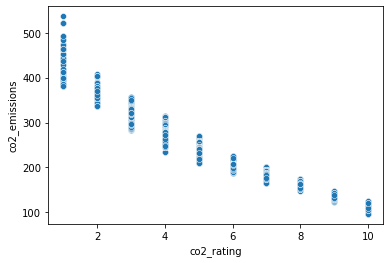

In [45]:
#Identifying relationship between co2_rating and co2_emissions for every dataset

co2 = pd.concat([d4[['co2_rating', 'co2_emissions']], d5[['co2_rating', 'co2_emissions']], d6[['co2_rating', 'co2_emissions']], d7[['co2_rating', 'co2_emissions']], d8[['co2_rating', 'co2_emissions']]], axis = 0)

sns.scatterplot(x = 'co2_rating', y = 'co2_emissions', data=co2)

In [46]:
print('co2_rating Mean   : ', co2['co2_rating'].mean())
print('co2_rating Median : ',co2['co2_rating'].median())
print('co2_rating Mode   : ',co2['co2_rating'].mode()[0])

co2_rating Mean   :  4.7511476664116294
co2_rating Median :  5.0
co2_rating Mode   :  5.0


In [47]:
#so we may fill the null values of 'co2_rating' in d1, d2 and d3 with value = 5for final dataset 
# but as we find on plotting before and after adding 5 tas 'co2_rating' in d1, d2 and d3, it hampers the data distribution

#so we replace the null values of 'co2_rating' in d1, d2 and d3 with value = 5for final dataset 

In [48]:
d1['co2_rating'] = pd.Series(dtype='float')
d1['co2_rating'].fillna(value=0, inplace=True)

d2['co2_rating'] = pd.Series(dtype='float')
d2['co2_rating'].fillna(value=0, inplace=True)

d3['co2_rating'] = pd.Series(dtype='float')
d3['co2_rating'].fillna(value=0, inplace=True)

d4['co2_rating'] = pd.Series(dtype='float')
d4['co2_rating'].fillna(value=0, inplace=True)

## Creating the ULTIMATE DATASET!!


In [49]:
dataset = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9])

In [50]:
dataset.isnull().sum()

year                        0
company                     0
model_name                  0
vehicle_class               0
engine_size                 0
cylinders                   0
transmission                0
fuel_type                   0
fuel_consumption_city       0
fuel_consumption_highway    0
fuel_consumption_comb1      0
fuel_consumption_comb2      0
co2_emissions               0
co2_rating                  0
dtype: int64

In [51]:
#rearranging the dataset columns

d = dataset.columns.to_list()
l = len(d)
d[l-2], d[l-1] = d[l-1], d[l-2]
dataset = dataset[d]
dataset.columns

Index(['year', 'company', 'model_name', 'vehicle_class', 'engine_size',
       'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_highway', 'fuel_consumption_comb1',
       'fuel_consumption_comb2', 'co2_rating', 'co2_emissions'],
      dtype='object')

## Dealing with copy variables with case sensitivity 

In [52]:
for i in range(len(dataset.columns)-1):
    if dataset.dtypes[i] == 'object':
        dataset[dataset.columns[i]] = dataset[dataset.columns[i]].str.lower()

## Dealing with repeated objects in Categorical Variables

In [53]:
#print(dataset['vehicle_class'].nunique())
vehicles = ['subcompact', 'compact', 'two_seater', 'station_wagon',
       'minicompact', 'mid_size', 'full_size', 'station_wagon',
       'pickup_truck', 'pickup_truck', 'van',
       'van', 'minivan', 'suv', 'suv',
       'special_purpose_vehicle', 'suv', 'suv',
       'station_wagon', 'suv', 'pickup_truck',
       'pickup_ruck', 'van',
       'station_wagon']

dataset['vehicle_class'].replace(to_replace=list(dataset['vehicle_class'].unique()), value=vehicles, inplace=True)

#print(dataset['vehicle_class'].nunique())

In [54]:
#Company 

dataset['company'].replace(to_replace=['alfa romeo', 'mercedes-benz'], value = ['alfa_romeo', 'mercedes_benz'], inplace=True)

In [55]:
#Transmission

transmission_type = []
for t in list(dataset['transmission'].unique()):    
    if t[1] == 'v':
        transmission_type.append('av')
    elif t[1] == 'm':
        transmission_type.append('am')
    elif t[1] == 's':
        transmission_type.append('as')
    elif t[0] == 'm':
        transmission_type.append('m')
    else:
        transmission_type.append('a')
        
dataset['transmission'].replace(to_replace=dataset['transmission'].unique(), value = transmission_type, inplace=True)

In [56]:
#dealing with NaN values in 'year': replace NaN values with any other value already in year because this variable as seenlater is irrelevant to the target variable

dataset['year'].fillna(2016, inplace=True)

In [57]:
for col in list(dataset.columns):
    print(col,'\n', dataset[col].unique(),'\n\n')

year 
 ['1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' 2016 '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020'
 '2021'] 


company 
 ['acura' 'alfa_romeo' 'audi' 'bentley' 'bmw' 'buick' 'cadillac'
 'chevrolet' 'chrysler' 'dodge' 'eagle' 'ferrari' 'ford' 'geo' 'honda'
 'hyundai' 'infiniti' 'jaguar' 'lexus' 'lincoln' 'mercury' 'mazda'
 'mercedes_benz' 'nissan' 'oldsmobile' 'plymouth' 'pontiac' 'porsche'
 'rolls-royce' 'saab' 'saturn' 'subaru' 'suzuki' 'toyota' 'volkswagen'
 'volvo' 'gmc' 'isuzu' 'jeep' 'land rover' 'daewoo' 'kia' 'maserati'
 'mini' 'mitsubishi' 'smart' 'hummer' 'aston martin' 'lamborghini'
 'bugatti' 'scion' 'fiat' 'ram' 'srt' 'genesis'] 


model_name 
 ['integra' 'integra gs-r' 'legend' ... 'rav4 (stop/start)'
 'rav4 awd (stop/start)' 'rav4 awd le'] 


vehicle_class 
 ['subcompact' 'compact' 'two_seater' 'station_wagon' 'minicompact'
 'mid_size' 'full_size' 'pickup_truck' 'van' 'minivan' 'suv'
 'special_purpose_vehicle' 'pickup_ruck']

## Exporting clean and preprocessed data to fresh .csv file:

In [58]:
#dataset.to_csv('data.csv', index=False)

#dataset = pd.read_csv('data.csv')

## EDA

In [59]:
dataset.sample(4)

,year,company,model_name,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_highway,fuel_consumption_comb1,fuel_consumption_comb2,co2_rating,co2_emissions
1761,2002,lexus,gs 430,mid_size,4.3,8.0,a,z,13.1,9.3,11.4,25.0,0.0,262
2427,2003,gmc,k1500 yukon xl 4x4,suv,5.3,8.0,a,x,17.7,12.3,15.3,18.0,0.0,352
1856,2002,nissan,sentra,compact,2.5,4.0,m,x,10.8,7.6,9.4,30.0,0.0,216
389,2021,gmc,sierra 4wd,pickup_ruck,5.3,8.0,a,x,14.3,10.7,12.7,22.0,3.0,298


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25049 entries, 1 to 917
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      25049 non-null  object 
 1   company                   25049 non-null  object 
 2   model_name                25049 non-null  object 
 3   vehicle_class             25049 non-null  object 
 4   engine_size               25049 non-null  float64
 5   cylinders                 25049 non-null  float64
 6   transmission              25049 non-null  object 
 7   fuel_type                 25049 non-null  object 
 8   fuel_consumption_city     25049 non-null  float64
 9   fuel_consumption_highway  25049 non-null  float64
 10  fuel_consumption_comb1    25049 non-null  float64
 11  fuel_consumption_comb2    25049 non-null  float64
 12  co2_rating                25049 non-null  float64
 13  co2_emissions             25049 non-null  int32  
dtypes: float

In [61]:
dataset.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_highway,fuel_consumption_comb1,fuel_consumption_comb2,co2_rating,co2_emissions
count,25049.000000,25049.000000,25049.000000,25049.000000,25049.000000,25049.000000,25049.000000,25049.000000
mean,3.360657,5.848337,12.826975,8.919095,11.068937,27.260889,0.921155,251.183520
std,1.340395,1.788600,3.465143,2.266541,2.889782,7.284512,1.982288,59.752518
min,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,0.000000,83.000000
25%,2.300000,4.000000,10.500000,7.300000,9.100000,22.000000,0.000000,209.000000
50%,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,0.000000,244.000000
75%,4.300000,8.000000,14.800000,10.300000,12.800000,31.000000,0.000000,290.000000
max,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,10.000000,608.000000


In [62]:
dataset.corr()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_highway,fuel_consumption_comb1,fuel_consumption_comb2,co2_rating,co2_emissions
engine_size,1.000000,0.909497,0.826112,0.758985,0.813135,-0.762331,-0.211533,0.829055
cylinders,0.909497,1.000000,0.793731,0.700000,0.770848,-0.717776,-0.195585,0.796959
fuel_consumption_city,0.826112,0.793731,1.000000,0.944905,0.993153,-0.924502,-0.205684,0.925443
fuel_consumption_highway,0.758985,0.700000,0.944905,1.000000,0.976106,-0.888581,-0.105928,0.903035
fuel_consumption_comb1,0.813135,0.770848,0.993153,0.976106,1.000000,-0.924022,-0.173398,0.929623
fuel_consumption_comb2,-0.762331,-0.717776,-0.924502,-0.888581,-0.924022,1.000000,0.183814,-0.904927
co2_rating,-0.211533,-0.195585,-0.205684,-0.105928,-0.173398,0.183814,1.000000,-0.151675
co2_emissions,0.829055,0.796959,0.925443,0.903035,0.929623,-0.904927,-0.151675,1.000000


In [63]:
#but the pairwise correlation value pf co2_Rating and co2_emissions is -0.15 at the same time graph suggests that 
#their exists a -ve polyn relationship between the 2 var.s

## Plotting Graphs for data distribution intuition

In [64]:
class plot:
    
    def __init__(self, dataset):
        self.dataset    = dataset
        self.target_var = dataset['co2_emissions']
    
    def scatter(self, depen_var):
        sns.scatterplot(x=dataset[depen_var], y=self.target_var)
        plt.xlabel(depen_var.upper())
        plt.ylabel('CO2 Emissions')
        plt.show()
    
    
    def box(self, depen_var):
        sns.boxplot(x=dataset[depen_var], y = self.target_var)
        plt.xlabel(depen_var.upper())
        plt.ylabel('CO2 Emissions')
        plt.show()
        
    def bar(self, depen_var):
        sns.barplot(x=dataset[depen_var], y = self.target_var)
        plt.xlabel(depen_var.upper())
        plt.xticks(rotation=45)
        plt.ylabel('CO2 Emissions')
        plt.show()

In [65]:
instance = plot(dataset)

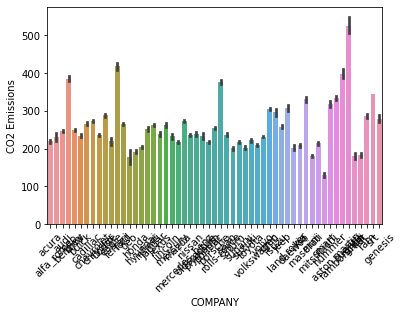

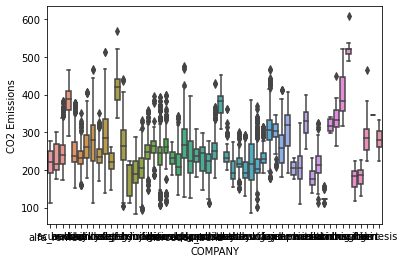

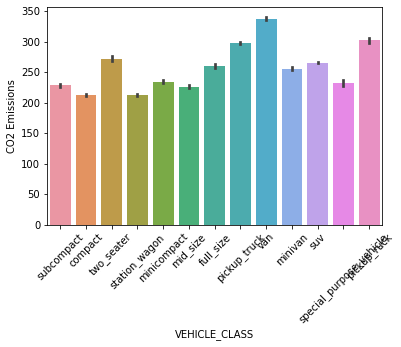

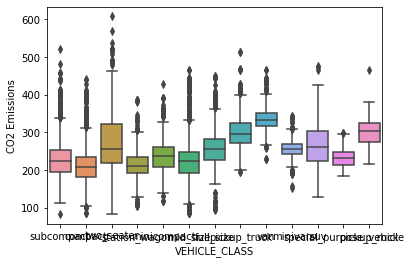

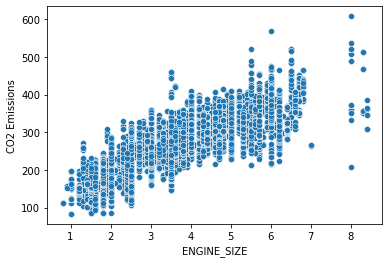

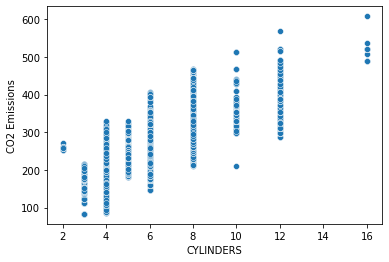

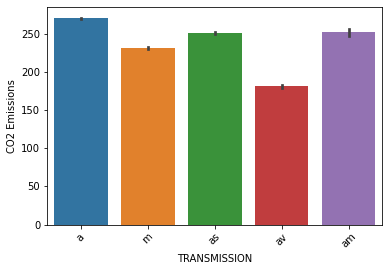

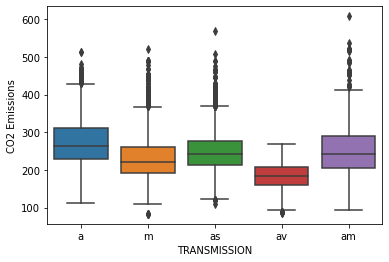

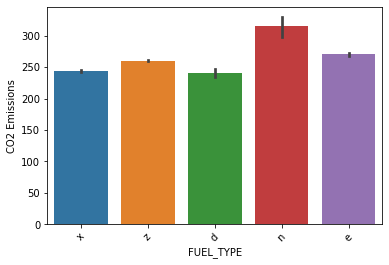

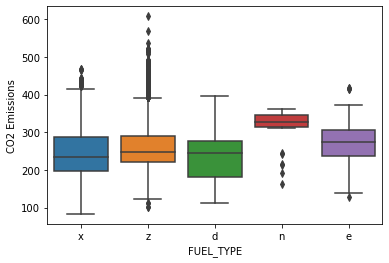

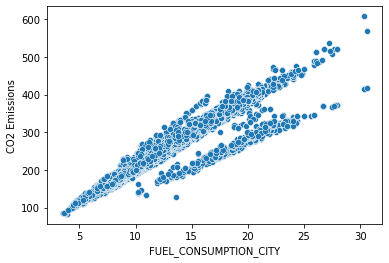

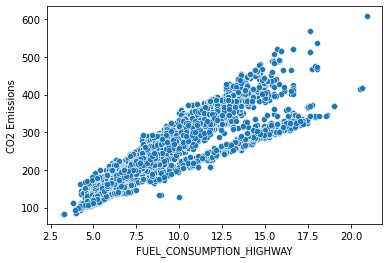

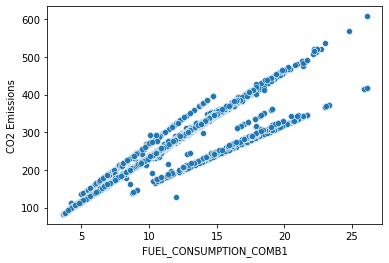

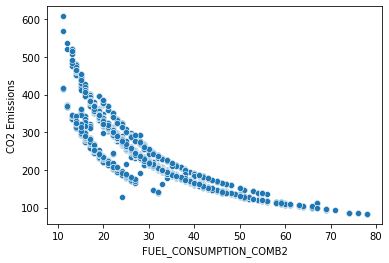

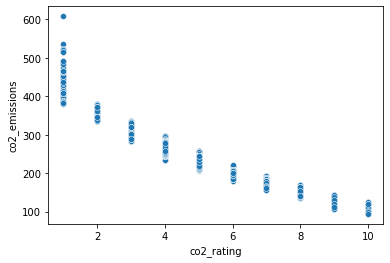

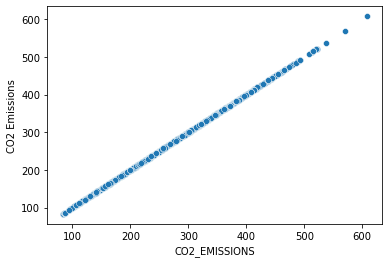

In [66]:
for i in range(len(dataset.dtypes)):
    if dataset.columns[i] == 'model_name' or dataset.columns[i] == 'year':
        pass
    elif dataset.columns[i] == 'co2_rating':
        sns.scatterplot(x=dataset['co2_rating'].replace(0, math.nan), y=dataset['co2_emissions'])
        plt.show()
    elif dataset.dtypes[i] == 'object':
        instance.bar(dataset.columns[i])
        instance.box(dataset.columns[i])
    else:
        instance.scatter(dataset.columns[i])

## Statistical Analysis

In [67]:
## ANOVA Test

for i in range(len(dataset.columns)-1):
    if dataset.columns[i] == 'model_name':
        pass
    elif dataset.dtypes[i] != 'object':
        print(str(dataset.columns[i]).upper(),'v/s CO2 Emissions Pearson Correlation Test')
        pearson_coef, p_val = stats.pearsonr(dataset[dataset.columns[i]], dataset['co2_emissions'])
        print('Pearson Coefficient :',pearson_coef,'\nP Value :',p_val,'\n\n')

    else: 
        model = ols('co2_emissions ~ {indep_var}'.format(indep_var = str(dataset.columns[i])), dataset).fit()
        print(str(dataset.columns[i]).upper(),'v/s CO2 Emissions Pearson Correlation Test')
        print(f"F-Statistic {model.fvalue: .3f}, \nP-Value: {model.f_pvalue: .4f} \n\n")

YEAR v/s CO2 Emissions Pearson Correlation Test
F-Statistic  35.789, 
P-Value:  0.0000 


COMPANY v/s CO2 Emissions Pearson Correlation Test
F-Statistic  295.292, 
P-Value:  0.0000 


VEHICLE_CLASS v/s CO2 Emissions Pearson Correlation Test
F-Statistic  889.609, 
P-Value:  0.0000 


ENGINE_SIZE v/s CO2 Emissions Pearson Correlation Test
Pearson Coefficient : 0.8290545446885592 
P Value : 0.0 


CYLINDERS v/s CO2 Emissions Pearson Correlation Test
Pearson Coefficient : 0.7969587942616517 
P Value : 0.0 


TRANSMISSION v/s CO2 Emissions Pearson Correlation Test
F-Statistic  936.525, 
P-Value:  0.0000 


FUEL_TYPE v/s CO2 Emissions Pearson Correlation Test
F-Statistic  155.322, 
P-Value:  0.0000 


FUEL_CONSUMPTION_CITY v/s CO2 Emissions Pearson Correlation Test
Pearson Coefficient : 0.9254429463851455 
P Value : 0.0 


FUEL_CONSUMPTION_HIGHWAY v/s CO2 Emissions Pearson Correlation Test
Pearson Coefficient : 0.9030353725799368 
P Value : 0.0 


FUEL_CONSUMPTION_COMB1 v/s CO2 Emissions Pea

In [68]:
# we willl ignore columns 'year', and 'model_name'
# fuel_consumption_comb1 and fuel_consumption_comb2 are the same factors in different units (kmpl/mpg). so we also drop fuel_consumption_comb2

In [69]:
df = dataset.copy()
df.drop('year', axis=1, inplace=True)
df.drop('model_name', axis=1, inplace=True)
df.drop('fuel_consumption_comb2', axis=1, inplace=True)
#df

## Dummy Variables

In [70]:
company_dummies = pd.get_dummies(df['company'])

In [71]:
vehicle_class_dummies = pd.get_dummies(df['vehicle_class'])

In [72]:
transmission_dummies = pd.get_dummies(df['transmission'])

In [73]:
fuel_dummies = pd.get_dummies(df['fuel_type'])
fuel_dummies.rename(columns = {'x':'regular_gasoline', 'z':'premium_gasoline', 'd':'diesel', 'e':'ethanol', 'n':'natural_gas'}, inplace=True)

In [74]:
target = df['co2_emissions']

In [75]:
df.drop(columns=['company', 'vehicle_class', 'transmission', 'fuel_type', 'co2_emissions'],inplace=True)

In [76]:
df = pd.concat([df, fuel_dummies, vehicle_class_dummies, company_dummies, target], axis=1)

## Final Dataset

In [77]:
#df.to_csv('ready_to_use_data.csv', index=False)
#df = pd.read_csv('ready_to_use_data.csv')

## Model Building

#### Ridge Regression

In [78]:
y_data = df['co2_emissions']
x_data = df.drop(columns=['co2_emissions'])

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15)

In [80]:
pr = PolynomialFeatures(degree=2)

In [81]:
x_train_pr = pr.fit_transform(x_train)
x_test_pr  = pr.fit_transform(x_test)

In [82]:
RR = Ridge(alpha=0.1)

In [83]:
RR.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [84]:
yhat = RR.predict(x_test_pr)

In [85]:
print(yhat[:4])
print(y_test.values[:4])

[322.23912267 265.99333947 418.66137939 257.89888607]
[322 268 419 258]


In [86]:
RR.score(x_train_pr, y_train)

0.9994804872263369

#### this indicates that Ridge regression model fits the data well

## Grid Search for Hyperparameter Tuning

In [87]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [88]:
grid = dict()
grid['alpha'] = [0.01, 0.03, 0.1, 0.3, 1]
search = GridSearchCV(RR, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results=search.fit(x_data, y_data)
print('Best Estimate for Hyper Parameter Tuning : ', results.best_estimator_)

Best Estimate for Hyper Parameter Tuning :  Ridge(alpha=0.01)


#### Final Model

In [89]:
RR = Ridge(alpha=0.1)
x_pr = pr.fit_transform(x_data)
RR.fit(x_pr, y_data)

Ridge(alpha=0.1)

In [90]:
y_pred = RR.predict(x_pr)

## Evaluation Metrics

In [91]:
#R^2 square value:
r2_score = RR.score(x_train_pr, y_train)
print("Coefficient of determination R^2 of prediction: {:.4f}".format(r2_score))

#Mean Square Error Value:
y_pred = RR.predict(x_pr)
mse = mean_squared_error(y_data, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

Coefficient of determination R^2 of prediction: 0.9995
RMSE value: 1.3631


## Comparing predicted vs actual values for our dataset

In [92]:
actual_values    = pd.DataFrame(data = y_data)
predicted_values = pd.DataFrame(data = y_pred)
for i in range(5):
    print(i, ':', actual_values.iloc[i][0], predicted_values.iloc[i][0])

0 : 202 202.2544734802827
1 : 193 193.00208974721338
2 : 191 191.080976238584
3 : 251 250.51889353054628
4 : 260 259.66915312726724


## Overfitting/Underfitting

In [93]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(21291, 79) (21291,) (3758, 79) (3758,)


In [94]:
# Checking for Overfitting or Underfitting the data


#split train/test data 55/45
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.55, random_state=1)
x_train_pr = pr.fit_transform(x_train)
x_test_pr  = pr.fit_transform(x_test)
y_pred_overfit_test = RR.predict(x_test_pr)

RRo = Ridge(alpha=0.1)
RRo.fit(x_train_pr, y_train)
RRo.predict(x_test_pr)
print(RRo.score(x_train_pr, y_train), '\n',RRo.score(x_test_pr, y_test))

0.99947069915811 
 0.9993999004152812


##good R^2 score even for 5545 train-test split suggests that the data is well fitted
## to make sure there is no <b>Over/Underfitting</b>, we plot predicted and actual data onto a plot

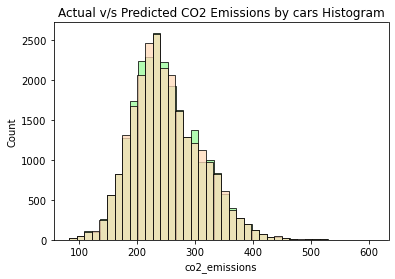

In [95]:
#Histogram:

a1= sns.histplot(y_data, bins=40, color = 'palegreen')
a2= sns.histplot(y_pred, bins=40, color = 'peachpuff', ax=a1)
plt.title('Actual v/s Predicted CO2 Emissions by cars Histogram')
plt.show()

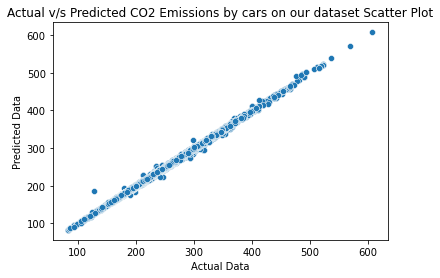

In [96]:
#Scatter Plot

sns.scatterplot(x=y_data, y=y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual v/s Predicted CO2 Emissions by cars on our dataset Scatter Plot')
plt.show()
plt.close()

### predicting some values

In [97]:
sample = x_data.iloc[:10]
sample_data = pr.fit_transform(sample)
print(sample_data)

[[1.  1.8 4.  ... 0.  0.  0. ]
 [1.  1.8 4.  ... 0.  0.  0. ]
 [1.  1.8 4.  ... 0.  0.  0. ]
 ...
 [1.  3.  6.  ... 0.  0.  0. ]
 [1.  3.  6.  ... 0.  0.  0. ]
 [1.  3.  6.  ... 0.  0.  0. ]]


In [98]:
print(RR.predict(sample_data))

[202.25447348 193.00208975 191.08097624 250.51889353 259.66915313
 257.42400134 267.00477475 255.57172809 301.28301625 266.72904623]


In [99]:
y_data[:10].values

array([202, 193, 191, 251, 260, 258, 267, 255, 301, 267])

## Model Serialization

In [100]:
# Save the Modle to file in the current working directory

Pkl_Filename = "co2_emissions_pickle.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(RR, file)

In [101]:
# Load the Model back from file
with open('co2_emissions_pickle.pkl', 'rb') as file:  
    RR = pickle.load(file)

#RR.predict(x_data, y_data) i.e. RR is the trained model which can be directly imported for prediction

## input data from user in 'dataset' column format and predict output 

In [102]:
#function to assist transform() by ensuring the right values are input for every parameter 

def help_t(data_ip, col, typee):
        item = col
        ip   = data_ip
        if typee == 'cat':
            avail = list(dataset[item].unique())
            print('\nIncorrect Information!')
            print('{} not found in Database. Please check and try again\n'.format(col))

            help_var = input('Enter \'help\' for details on available options for {} or \'q\' to quit or \'continue\' to try again\n'.format(item)).lower()

            if help_var == 'help':
                
                if col == 'transmission':
                    transmission_dic = {'a':'Automatic', 'am':'Automated manual', 'as':'Automatic with select shift', 'av':'Continuously variable', 'm':'manual'}
                    for t_key, t_val in transmission_dic.items():
                        print('for',t_val,'enter',t_key)
                
                elif col == 'fuel_type':
                    fuel_type_dic = {'x':'Regular gasoline','z':'Premium gasoline','d':'Diesel','e':'Ethanol (E85)', 'n':'Natural gas'}
                    for t_key, t_val in fuel_type_dic.items():
                        print('for',t_val,'enter',t_key)
                
                else:
                    print('Available options for {} :\n'.format(item), avail,'\n\n')
                
                
                help_ip = input('Enter {}  :'.format(item)).lower()
                if help_ip in avail:
                    return help_ip
                else:
                    help_t(help_ip, item, 'cat')

            elif help_var == 'continue':
                help_ip = input('Enter {}  :'.format(item)).lower()
                if help_ip in avail:
                    return help_ip
                else:
                    help_t(help_ip,item, 'cat')


            elif help_var == 'q':
                return 'q'

            else:
                print('Please enter Valid input')
                help_t(ip, item, 'cat')
            
        else:
            print('\nPlease enter a numerical value for {}'.format(col))
            help_ip = input('Enter {}  :'.format(item))
            
            if help_ip.isnumeric():
                return float(help_ip)

            help_t(help_ip ,item, 'num')

In [103]:
#function to prompt if user wants to calculate CO2 Emission again after a successful prediction or failure because of invalid input (NaN)

def repeat():
    again = input('Wish to estimate car CO2 emission(y/n) again?\n')
    if again.lower() == 'y':
        return 'y'

    elif again.lower() == 'n':
        return 'n'

    else: 
        print('Please enter valid input (y/n)')
        repeat()


In [104]:
#function takes no parameters. 
#When called, it prompts for car informatin as per 'dataset' and prints the estimated CO2 emission as well as returns it (most recent estimation in case more than once the emission is predicted)


def trans():
    iput_dic = {}
    estimated_val = []
    print('Enter car information\n')
    t = 0
    num_vars = ['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_highway', 'fuel_consumption_comb1', 'fuel_consumption_comb2', 'co2_rating']
    cat_vars = ['company', 'vehicle_class', 'transmission', 'fuel_type']
    
    columns = {'Company':'company', 'Vehicle Class':'vehicle_class', 'Transmission':'transmission', 'Fuel Type':'fuel_type',
               'Engine Size':'engine_size', 'Number of Cylinders': 'cylinders', 'Fuel Consumption in City (L/100km)':'fuel_consumption_city',
               'Fuel Consumption in Highway (L/100km)':'fuel_consumption_highway', 'Fuel Consumption in general (mpg)':'fuel_consumption_comb1',
               'Fuel Consumption combined (mpg)':'fuel_consumption_comb2'}
    
    for col_pretty, col in columns.items():

        iput = input('Enter {}  :'.format(col_pretty)).lower()
        
        #for numerical variables
        if col in num_vars:
            if iput.isnumeric():
                iput_dic[col] = iput
            else:
                ans = help_t(iput, col, 'num')
                if ans == 'q':
                    return
                else:
                    iput_dic[col] = ans
                
        #for categorical vairables
        elif col in cat_vars:
            if iput in dataset[col].unique():
                iput_dic[col] = iput
            else:
                ans = help_t(iput, col, 'cat')
                if ans == 'q':
                    return
                else:
                    iput_dic[col] = ans

                    
        iput_df = pd.DataFrame(data = np.zeros(shape=(1, 79)), columns = list(df.columns)[:len(df.columns)-1])
        
        for key, val in iput_dic.items():
            if key in list(df.columns):
                iput_df[key] = val
                
            elif val in list(df.columns):
                iput_df[val] = 1
                
            else:
                pass
    
    
    try:
        estimation = RR.predict(pr.fit_transform(iput_df))
        print('\n\nEstimated CO2 Emission is', str(estimation[0]), 'g/km\n')

        
        another = repeat()
        if another == 'n':
            return estimation
        trans()
        
    except ValueError:
        print('\nInvalid Input. Please try again\n')
        another = repeat()
        if another == 'n':
            return estimation
        trans()

In [106]:
if __name__ == '__main__':
    trans()

Enter car information

Enter Company  :BMW
Enter Vehicle Class  :suv_typo_

Incorrect Information!
vehicle_class not found in Database. Please check and try again

Enter 'help' for details on available options for vehicle_class or 'q' to quit or 'continue' to try again
help
Available options for vehicle_class :
 ['subcompact', 'compact', 'two_seater', 'station_wagon', 'minicompact', 'mid_size', 'full_size', 'pickup_truck', 'van', 'minivan', 'suv', 'special_purpose_vehicle', 'pickup_ruck'] 


Enter vehicle_class  :suv
Enter Transmission  :ee

Incorrect Information!
transmission not found in Database. Please check and try again

Enter 'help' for details on available options for transmission or 'q' to quit or 'continue' to try again
continue
Enter transmission  :m
Enter Fuel Type  :e
Enter Engine Size  :8
Enter Number of Cylinders  :6
Enter Fuel Consumption in City (L/100km)  :12
Enter Fuel Consumption in Highway (L/100km)  :14
Enter Fuel Consumption in general (mpg)  :12
Enter Fuel Consu